In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
from sklearn.svm import SVC

# Instantiate and train the linear SVM model
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [3]:
# Instantiate an SVC object with the kernel parameter set to 'rbf' and random_state set to 42.
rbf_svm = SVC(kernel='rbf', random_state=42)

# Train the instantiated RBF SVM model using the training data.
rbf_svm.fit(X_train, y_train)

SVC(random_state=42)

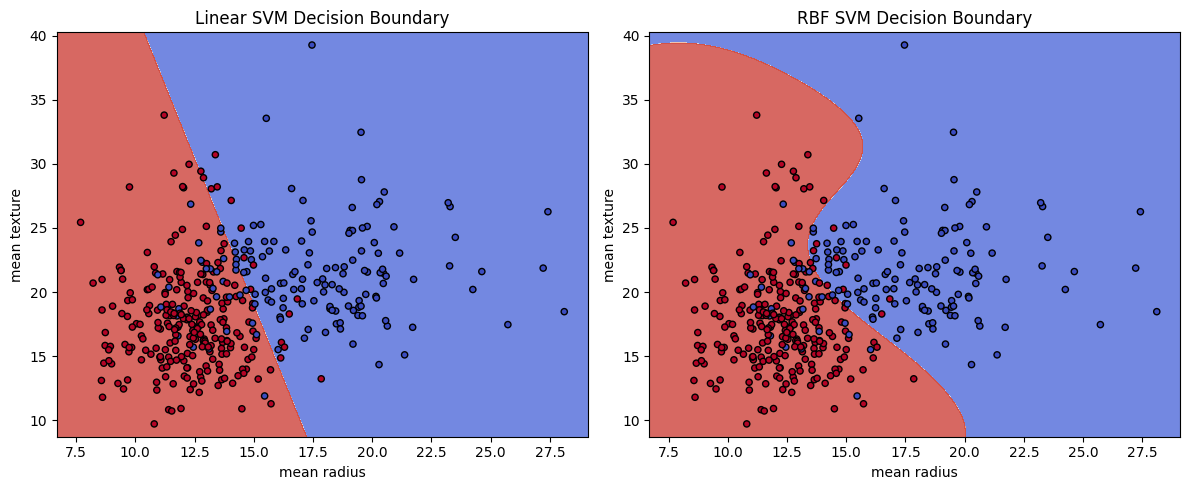

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization (e.g., mean radius and mean texture)
X_train_2d = X_train[:, [0, 1]]

# Retrain the models on the 2D data
linear_svm_2d = SVC(kernel='linear', random_state=42)
linear_svm_2d.fit(X_train_2d, y_train)

rbf_svm_2d = SVC(kernel='rbf', random_state=42)
rbf_svm_2d.fit(X_train_2d, y_train)

# Create a meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid for both models
Z_linear = linear_svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_rbf = rbf_svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot the decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Linear SVM
axes[0].contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)
axes[0].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axes[0].set_title('Linear SVM Decision Boundary')
axes[0].set_xlabel(cancer.feature_names[0])
axes[0].set_ylabel(cancer.feature_names[1])

# Plot for RBF SVM
axes[1].contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
axes[1].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axes[1].set_title('RBF SVM Decision Boundary')
axes[1].set_xlabel(cancer.feature_names[0])
axes[1].set_ylabel(cancer.feature_names[1])

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 1, 'gamma': 0.001}


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Instantiate an SVC model with the best hyperparameters found by GridSearchCV
best_rbf_svm = SVC(kernel='rbf', random_state=42, **grid_search.best_params_)

# Use cross_val_score to evaluate the model
cv_scores = cross_val_score(best_rbf_svm, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.9375     0.925      0.925      0.87341772 0.89873418]
Mean cross-validation score: 0.9119303797468354


## Summary:

### Data Analysis Key Findings

*   The breast cancer dataset was successfully loaded and split into training and testing sets with a 70/30 ratio.
*   Both linear and RBF kernel SVM models were successfully trained on the training data.
*   Visualization of the decision boundaries using the 'mean radius' and 'mean texture' features showed a linear boundary for the linear SVM and a non-linear boundary for the RBF SVM.
*   Hyperparameter tuning for the RBF SVM using GridSearchCV with a parameter grid for 'C' and 'gamma' and 5-fold cross-validation identified the best hyperparameters as `{'C': 1, 'gamma': 0.001}`.
*   Evaluation of the RBF SVM model with the best hyperparameters using 5-fold cross-validation resulted in a mean accuracy score of approximately 0.9119.
*   The RBF kernel SVM, with tuned hyperparameters, shows promising performance on the breast cancer dataset, achieving a mean cross-validation accuracy of around 91.2%.
